In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from Utils.scraper_script import read_JSON
import Modules.NetBuilder.net_builder as net_builder
import Modules.NetVisualizer.net_visualizer as net_vis
import Modules.NetAnalyser.DataGeneration.script as report_builder

In [2]:
rata = read_JSON('./OutputFiles/rata_disability_current_expanded.json')
g=net_builder.net_build(rata)
for node in list(g.nodes):
    if not g.nodes[node]['type']=='canonical_tag':
        g.remove_node(node)

# net_vis.net_visualize(g)

# Properties

For analyse if it is strongly/wekly connected drop(not analyse the full expanded rata) the alone nodes (freeforms)

In [29]:
#strongly connected if every vertex is reachable from any other vertex
nx.is_strongly_connected(g)

#if it is strongly connected when ignoring directions
nx.is_weakly_connected(g)

True

The eccentricity of a node v is the maximum distance from v to all other nodes in G.

Vertex with Min eccentricity is a central point, all central points conform center of the graph

In [38]:
min(nx.eccentricity(g.to_undirected()),key=lambda x: min(x))

'Disabled Character'

In [74]:
#max eccentricity 
nx.diameter(g.to_undirected())

#min eccentricity
nx.radius(g.to_undirected())

4

In [72]:
triangles =nx.triangles(g.to_undirected())

[(key,value) for key,value in triangles.items() if value>1 ]

[('Muteness', 6)]

Text(0, 0.5, 'Frequency')

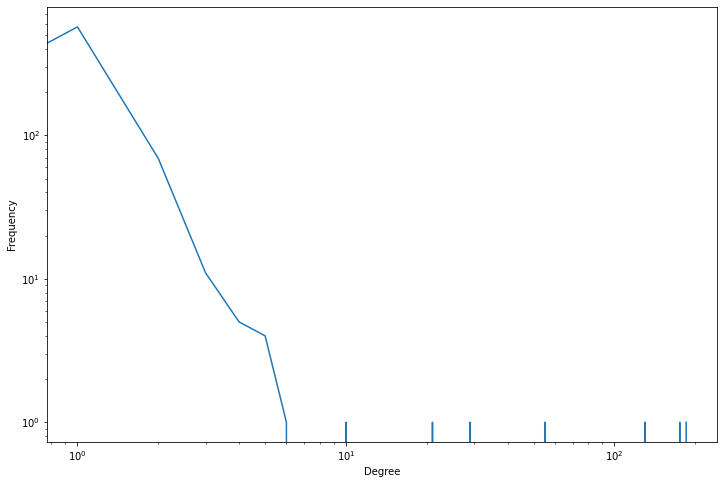

In [98]:
degree_freq = nx.degree_histogram(g)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq) 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [113]:
[(k,v) for k,v in dict(g.in_degree).items() if v>= 2]


[('Blind Character', 2),
 ('Blind James T. Kirk', 3),
 ('Deaf Character', 2),
 ('Disabled Character of Color', 2),
 ('Mute Richie Tozier', 2),
 ('Mute Eddie Kaspbrak', 2),
 ('Selectively Mute Clay | Dream (Video Blogging RPF)', 2),
 ('Selectively Mute Tommyinnit (Video Blogging RPF)', 2),
 ('Selectively Mute Toby Smith | Tubbo', 2),
 ('Selectively Mute Technoblade (Video Blogging RPF)', 2),
 ('Selectively Mute Ranboo (Video Blogging RPF)', 2),
 ('Mute Kong | Aether (Genshin Impact)', 2),
 ('Permanent Injury', 2),
 ('Blind Eddie Kaspbrak', 2),
 ('Deaf Eddie Kaspbrak', 2),
 ('Amputee Eddie Kaspbrak', 2),
 ('Eddie Kaspbrak in a Wheelchair', 2),
 ('Blind Min Yoongi | Suga', 2),
 ('Blind Kim Taehyung | V', 2),
 ('Blind Jeon Jungkook', 2),
 ('Blind Park Jimin (BTS)', 2),
 ('Deaf James T. Kirk', 3),
 ('Deaf Jeon Jungkook', 2),
 ('Deaf Min Yoongi | Suga', 2),
 ('Deaf Kim Taehyung | V', 2),
 ('Deaf Park Jimin (BTS)', 2),
 ('Jeon Jungkook in a Wheelchair', 2),
 ('Park Jimin in a Wheelchair (BTS)

In [102]:
max=(0,1)
for node in g.nodes:
    if g.out_degree(node) > max[0]:
        max=(g.out_degree(node),node)

In [118]:
nx.find_cycle(g.to_undirected())

[('Disability', 'Blindness'),
 ('Blindness', 'Blind Character'),
 ('Blind Character', 'Disabled Character'),
 ('Disabled Character', 'Disability')]

# More properties

In [137]:
a= nx.k_components(g.to_undirected())

In [154]:
b=[]
[b.extend(list(item))for item in a[2]]
h=g.subgraph(b)

In [155]:
net_vis.net_visualize(h, file_name="first_component")

<class 'pyvis.network.Network'> |N|=667 |E|=696

# Reports


In [3]:
dfs=report_builder.get_G_properties(g)
report_builder.save_xls(dfs, './report.xlsx')

In [4]:
g.name

''